<a href="https://colab.research.google.com/github/Doaa313/Doaa313/blob/main/task_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
file_path = '/content/Doaa Naser Ahmed Mosbah Metwally - Housing(2).csv'
housing_data = pd.read_csv(file_path)


In [6]:
missing_data = housing_data.isnull().sum()
print("Missing values in each column:\n", missing_data)

Missing values in each column:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


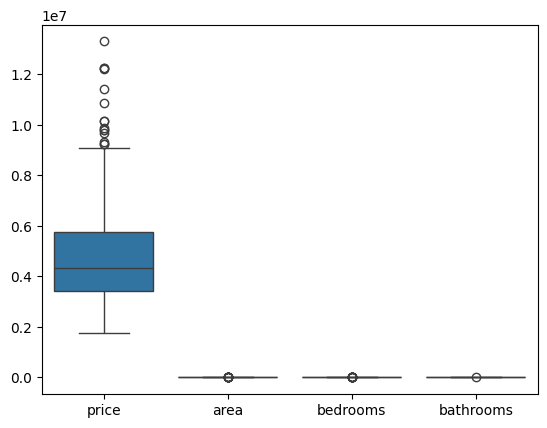

In [7]:
sns.boxplot(data=housing_data[['price', 'area', 'bedrooms', 'bathrooms']])
plt.show()


In [8]:
housing_data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [9]:
label_encoders = {}
for column in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']:
    label_encoders[column] = LabelEncoder()
    housing_data[column] = label_encoders[column].fit_transform(housing_data[column])


In [10]:
X = housing_data.drop(columns='price')
y = housing_data['price']


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [13]:
y_pred = decision_tree.predict(X_test)


In [14]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# طباعة النتائج
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)


Mean Absolute Error (MAE): 1222399.0825688073
Mean Squared Error (MSE): 2688177649082.569
Root Mean Squared Error (RMSE): 1639566.2990811225
R^2 Score: 0.4681689010023007


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


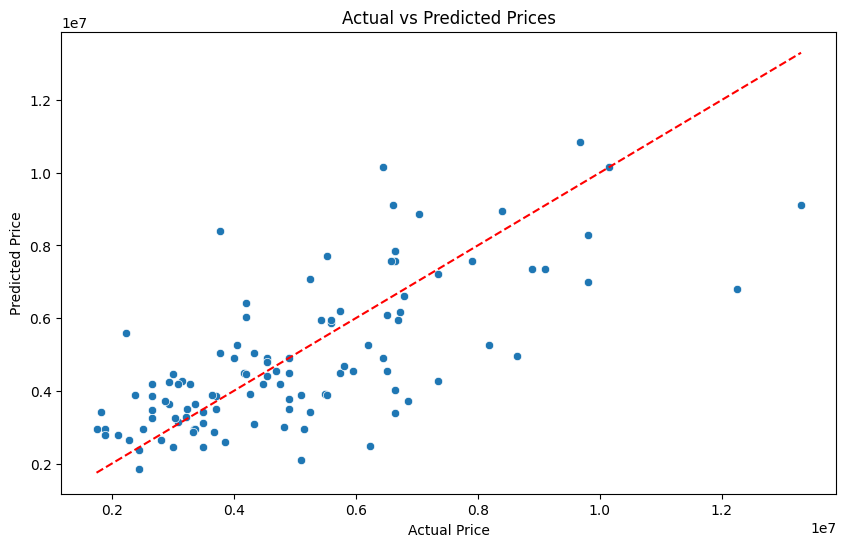

In [15]:

comparison_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=comparison_df, x='Actual Price', y='Predicted Price')
plt.plot([comparison_df['Actual Price'].min(), comparison_df['Actual Price'].max()],
         [comparison_df['Actual Price'].min(), comparison_df['Actual Price'].max()],
         '--', color='red')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()
